## Import libraries

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Look at the big picture

Your model should learn from this data and be able to predict the Priceof a house in in any Suburn, given all the other metrics.

## Get the data

In [13]:
# Import our csv file and store it as the varibale 'df'
df = pd.read_csv('melb_data.csv')
# Turn of mac columns, so we can view the entire width of the dataframe
pd.set_option('max_columns', None)
# Print number of columns by assessing shape tuple with index 0
print(f'Number of rows: {df.shape[0]}')
# Print number of columns by assessing shape tuple with index 1
print(f'Number of columns: {df.shape[1]}')
df.head()

Number of rows: 13580
Number of columns: 21


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**Take a look at our column data types and observe any missing values**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

**Backfill missing values**

In [61]:
burbs_and_cas = df[['Suburb', 'CouncilArea']]
a = set(burbs_and_cas['Suburb'])
burbs_and_cas.dropna(how='all', inplace=True)
b = set(burbs_and_cas['Suburb'])
if a==b:
    burbs_and_cas.drop_duplicates(
        subset=['Suburb'],
        keep='first',
        inplace=True
    )
    
    df_filled = df.merge(
        burbs_and_cas,
        left_on = 'Suburb',
        right_on= 'Suburb',
        how = 'inner',
    )
    
    df_filled.drop(
    columns=['CouncilArea_x'],
    inplace=True
    )
    
    # This drops 7 rows from out dataset
    df_filled = df_filled[df_filled['CouncilArea_y'].notna()]
    
    df_filled.rename(
        columns= {'CouncilArea_y': 'CouncilArea'},
        inplace=True
    )

df_filled[['YearBuilt', 'BuildingArea', 'Car']] = df_filled[['YearBuilt', 'BuildingArea', 'Car']].interpolate(method='linear')

df_filled = df_filled.iloc[1: , : ]

df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13572 entries, 1 to 13572
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13572 non-null  object 
 1   Address        13572 non-null  object 
 2   Rooms          13572 non-null  int64  
 3   Type           13572 non-null  object 
 4   Price          13572 non-null  float64
 5   Method         13572 non-null  object 
 6   SellerG        13572 non-null  object 
 7   Date           13572 non-null  object 
 8   Distance       13572 non-null  float64
 9   Postcode       13572 non-null  float64
 10  Bedroom2       13572 non-null  float64
 11  Bathroom       13572 non-null  float64
 12  Car            13572 non-null  float64
 13  Landsize       13572 non-null  float64
 14  BuildingArea   13572 non-null  float64
 15  YearBuilt      13572 non-null  float64
 16  Lattitude      13572 non-null  float64
 17  Longtitude     13572 non-null  float64
 18  Region

c:\Users\dev_env\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


**Change Data Types**

 - Postcode
 - Bedroom
 - Bathroom
 - PropertyCount

In [79]:
df_filled['Postcode'] = df_filled['Postcode'].astype(str)
df_filled['Bedroom2'] = df_filled['Bedroom2'].astype(int)
df_filled['Bathroom'] = df_filled['Bathroom'].astype(int)
df_filled['YearBuilt'] = df_filled['YearBuilt'].astype(int)
df_filled['Car'] = df_filled['Car'].astype(int)
df_filled['Propertycount'] = df_filled['Propertycount'].astype(int)
df_filled['Date'] = pd.to_datetime(df_filled['Date'])

In [71]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


<AxesSubplot:title={'center':'Number of sales by Property Type'}, ylabel='Type,Type'>

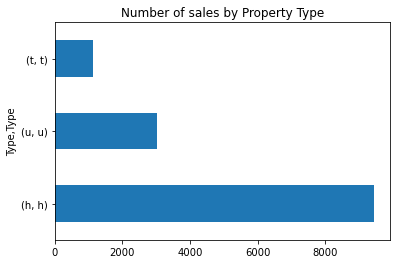

In [72]:
from turtle import title


df_filled.groupby(['Type'])['Type'].value_counts().nlargest(10).plot(kind='barh', title='Number of sales by Property Type')

<AxesSubplot:title={'center':'Number of sales by Seller'}, ylabel='SellerG,SellerG'>

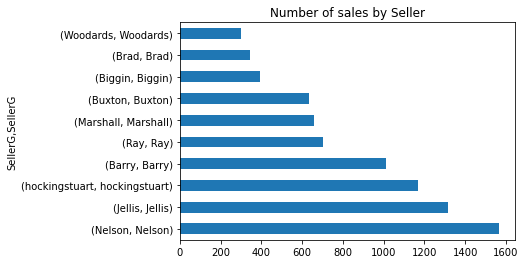

In [73]:
df_filled.groupby(['SellerG'])['SellerG'].value_counts().nlargest(10).plot(kind='barh', title='Number of sales by Seller')

<AxesSubplot:title={'center':'Number of sales by Region'}, ylabel='Regionname,Regionname'>

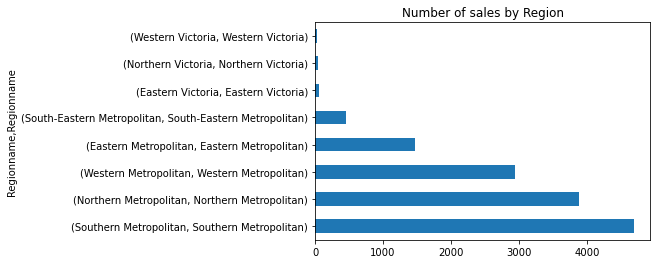

In [74]:
df_filled.groupby(['Regionname'])['Regionname'].value_counts().nlargest(10).plot(kind='barh', title='Number of sales by Region')

In [76]:
y = df_filled['Price']
X = df_filled.drop(columns=['Price'], axis=1)
X

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,CouncilArea
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,2016-04-02,2.5,3067.0,2,1,0,156.0,79.000000,1900,-37.80790,144.99340,Northern Metropolitan,4019,Yarra
2,Abbotsford,5 Charles St,3,h,SP,Biggin,2017-04-03,2.5,3067.0,3,2,0,134.0,150.000000,1900,-37.80930,144.99440,Northern Metropolitan,4019,Yarra
3,Abbotsford,40 Federation La,3,h,PI,Biggin,2017-04-03,2.5,3067.0,3,2,1,94.0,146.000000,1957,-37.79690,144.99690,Northern Metropolitan,4019,Yarra
4,Abbotsford,55a Park St,4,h,VB,Nelson,2016-04-06,2.5,3067.0,3,1,2,120.0,142.000000,2014,-37.80720,144.99410,Northern Metropolitan,4019,Yarra
5,Abbotsford,129 Charles St,2,h,S,Jellis,2016-07-05,2.5,3067.0,2,1,0,181.0,176.000000,1962,-37.80410,144.99530,Northern Metropolitan,4019,Yarra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13568,Springvale South,4 Lindy Ct,3,h,VB,Boutique,2017-08-19,22.2,3172.0,3,1,3,775.0,155.373333,1976,-37.97480,145.15213,South-Eastern Metropolitan,4054,Greater Dandenong
13569,Yarra Glen,15 Yarra St,3,h,SP,Buckingham,2017-07-22,31.4,3775.0,3,2,1,863.0,180.560000,1975,-37.65391,145.37389,Northern Victoria,1160,Yarra Ranges
13570,Brookfield,30 Pinrush Rd,4,h,S,Reliance,2017-07-29,29.8,3338.0,4,2,2,576.0,189.000000,2010,-37.69104,144.54532,Western Victoria,3122,Melton
13571,Emerald,35 Kings Rd,2,h,S,Kaye,2017-07-29,36.9,3782.0,2,1,0,1000.0,81.790000,1980,-37.93064,145.44530,Eastern Victoria,2259,Cardinia


**Split Dataset**

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,CouncilArea
11951,Epping,4 Longwood Dr,3,h,SP,Millership,2017-03-09,19.6,3076.0,3,1,2,654.0,131.500,2007,-37.63923,145.05306,Northern Metropolitan,10926,Whittlesea
8929,St Kilda,18 Crimea St,5,h,S,Abercromby's,2016-10-12,6.1,3182.0,5,3,3,1294.0,378.000,1884,-37.85890,144.98830,Southern Metropolitan,13240,Port Phillip
11634,Caroline Springs,2 Cranwell Sq,3,t,S,O'Brien,2017-08-07,14.8,3023.0,3,2,2,194.0,313.245,2010,-37.72530,144.74840,Western Metropolitan,7719,Melton
5769,Maidstone,27 Dunedin St,3,h,S,Burnham,2016-03-09,9.2,3012.0,3,1,1,576.0,128.000,1970,-37.78080,144.86780,Western Metropolitan,3873,Maribyrnong
3220,Collingwood,5/61 Little Oxford St,2,u,S,Jellis,2016-09-24,1.6,3066.0,2,1,1,0.0,60.000,2002,-37.80460,144.98400,Northern Metropolitan,4553,Yarra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,Ivanhoe,3/123 Waterdale Rd,3,t,S,Miles,2017-04-03,7.9,3079.0,3,2,1,108.0,344.000,1997,-37.76680,145.04340,Eastern Metropolitan,5549,Banyule
13419,Eltham North,45 Parry Rd,4,h,SP,Buckingham,2017-05-27,18.0,3095.0,4,3,2,792.0,233.000,1995,-37.68966,145.14649,Eastern Metropolitan,2346,Nillumbik
5391,Keilor East,3A Warren Ct,4,t,S,Barry,2017-08-07,11.7,3033.0,4,2,1,330.0,168.800,1968,-37.74165,144.86279,Western Metropolitan,5629,Moonee Valley
861,Balwyn,3/12 Brenbeal St,2,u,S,hockingstuart,2016-08-28,9.7,3103.0,2,1,1,130.0,80.000,1960,-37.81200,145.08760,Southern Metropolitan,5682,Boroondara


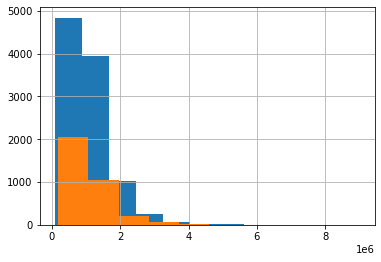

In [35]:
prices = [y_train, y_test]

for sets in prices:
    sets.hist()

## Discover and visualise the data to gain insights

**Ensure what we are trying to predict is approximately the same in the training and testing set**

**Correlations**

In [42]:
corr_matrix = df_filled.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.496882
Bedroom2         0.476199
Bathroom         0.467265
BuildingArea     0.279233
Car              0.237443
Longtitude       0.203908
Landsize         0.037334
Propertycount   -0.042534
Distance        -0.162451
Lattitude       -0.212909
YearBuilt       -0.246968
Name: Price, dtype: float64

C:\Users\dev_env\AppData\Local\Temp/ipykernel_4144/3149180988.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_filled.corr(), dtype=np.bool))


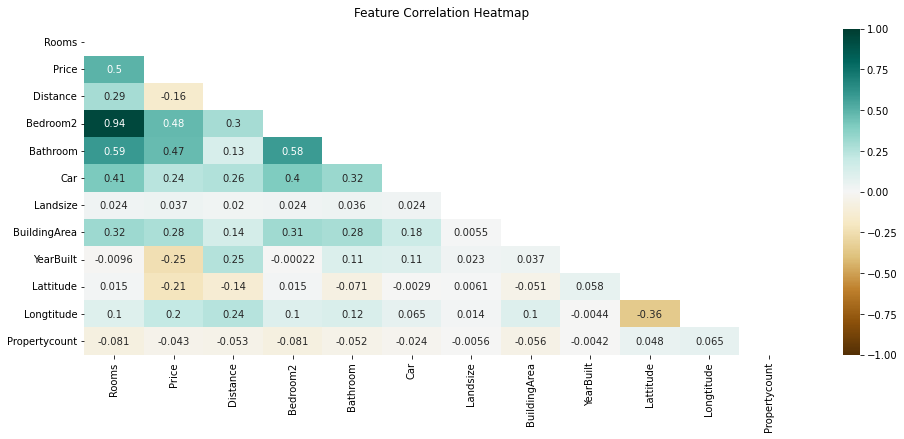

In [44]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
mask = np.triu(np.ones_like(df_filled.corr(), dtype=np.bool))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_filled.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Feature Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Histograms**

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>,
        <AxesSubplot:title={'center':'Landsize'}>],
       [<AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>],
       [<AxesSubplot:title={'center':'Propertycount'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

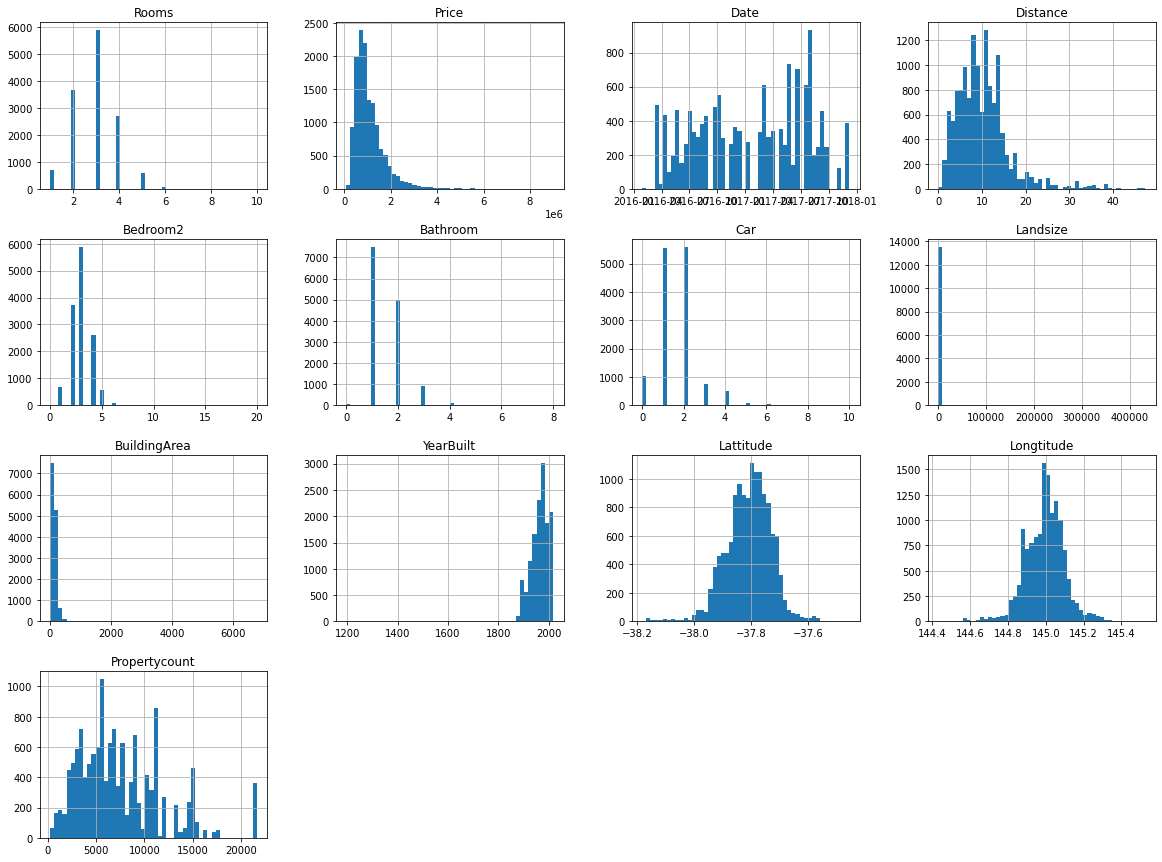

In [75]:
df_filled.hist(
    bins=50,
    figsize=(20,15))

**Create a copy of the training dataset so we can expriement without altering the underlying data**

<AxesSubplot:title={'center':'Sales distribution around Melbourne'}, xlabel='Longtitude', ylabel='Lattitude'>

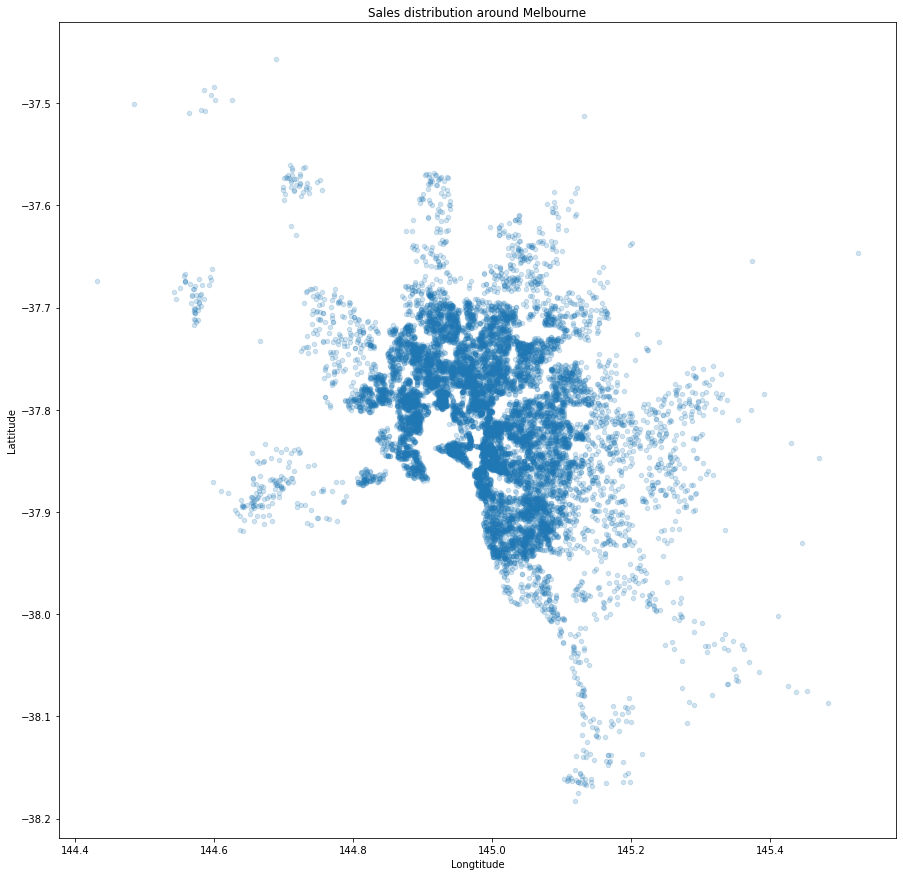

In [81]:
df_filled.plot(
    kind="scatter", 
    x="Longtitude", 
    y="Lattitude", 
    alpha=.2, 
    figsize=(15,15), 
    title='Sales distribution around Melbourne')

## Data Preprocessing (preparing the data for the ML algorithms)

 - **Feature Engineering**: create new columns from our dataset using domain knowledge
 - **Imputation**: Insert values where they may be missing to have a complete dataset (we have already done this)
 - **Encoding Categorical Variables**: Transforming categorical variables into a numerical form that our ML algorithms can understand
 - **Scaling**: Apply a Scaler that transforms all of our data on the same numerical scale

## Select a model and train it

## Fine-tune your model

## Present your solution

## Launch, monitor and maintain your system